In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ajout du dossier src au path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Imports du projet
from processing.data_processing import load_data
from processing.statistics_ import save_statistics
from visualization.visualization import plot_data



In [3]:
df = load_data("../data/energy_data.csv")
df.head()


,date,index,price_per_kwh,devices,temps,consumption_kwh,cost
0,2024-12-06,8000,0.12,Fridge,soleil,0.0,0.00
1,2024-12-07,8100,0.12,"Fridge, Oven",pluie,100.0,12.00
2,2024-12-08,8300,0.11,"Fridge, TV",mitigé,200.0,22.00
3,2024-12-09,7800,0.12,"Fridge, Oven, Dryer",soleil,-500.0,-60.00
4,2024-12-10,7648,0.09,"Fridge, Dryer",mitigé,-152.0,-13.68


In [4]:
# Statistiques descriptives
df.describe()

,date,index,price_per_kwh,consumption_kwh,cost
count,6,6.000000,6.000000,6.000000,6.000000
mean,2024-12-08 12:00:00,7924.666667,0.108333,-50.000000,-5.833333
min,2024-12-06 00:00:00,7648.000000,0.090000,-500.000000,-60.000000
25%,2024-12-07 06:00:00,7725.000000,0.095000,-114.000000,-10.260000
50%,2024-12-08 12:00:00,7900.000000,0.115000,26.000000,2.340000
75%,2024-12-09 18:00:00,8075.000000,0.120000,88.000000,10.170000
max,2024-12-11 00:00:00,8300.000000,0.120000,200.000000,22.000000
std,NaN,252.924231,0.014720,249.322281,29.095973


In [5]:
# Affichage des dates disponibles
# 📅 Affichage des dates disponibles
df["date"].min(), df["date"].max()



(Timestamp('2024-12-06 00:00:00'), Timestamp('2024-12-11 00:00:00'))

In [6]:
# Appareils les plus utilisés
from collections import Counter

device_list = df["devices"].str.split(", ").sum()
device_counts = Counter(device_list)

pd.DataFrame(device_counts.most_common(), columns=["Appareil", "Occurrences"])


,Appareil,Occurrences
0,Fridge,6
1,Dryer,3
2,Oven,2
3,TV,1


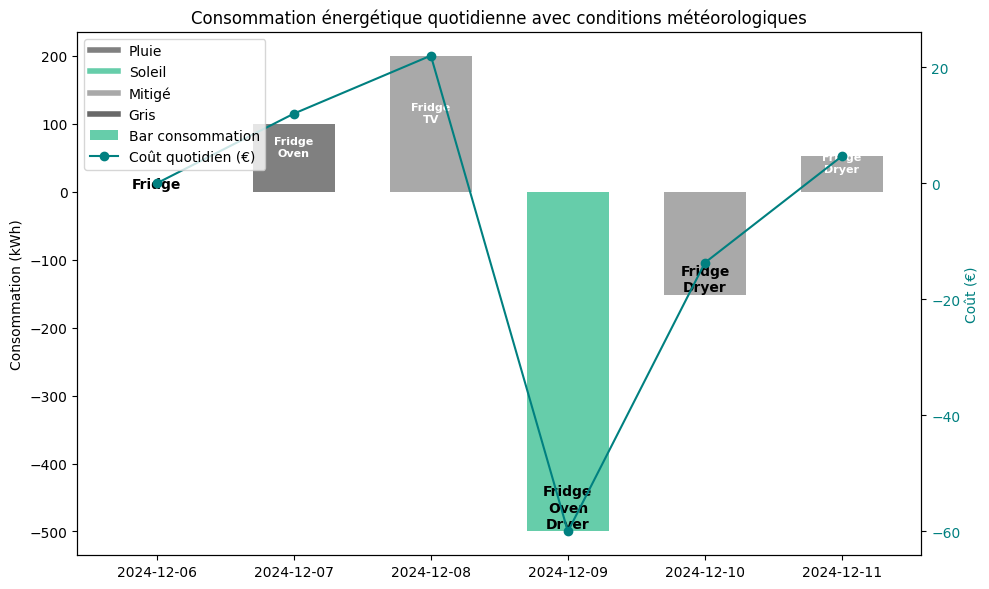

In [7]:
# Affichage matplotlib
%matplotlib inline
plot_data(df)
